In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("elapsed_time.csv")
df.head()

,dataset,base_model,include_drift,elapsed_time
0,electricity,LogisticRegression,True,1054.901581
1,electricity,LogisticRegression,False,820.853831
2,electricity,DecisionTreeClassifier,True,865.554243
3,electricity,DecisionTreeClassifier,False,780.522647
4,electricity,SVC,True,926.743661


In [3]:
datasets = df["dataset"].unique()
datasets

array(['electricity', 'powersupply', 'airlines', 'rialto'], dtype=object)

In [4]:
def plot_dataset_time(dataset: str):
    df_plot = df[df["dataset"] == dataset].sort_values(by=["base_model"])
    labels = df_plot["base_model"].unique()

    with_drift = df_plot[df_plot["include_drift"] == True]["elapsed_time"]
    without_drift = df_plot[df_plot["include_drift"] == False]["elapsed_time"]

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    fig.set_figwidth(25)
    fig.set_figheight(10)
    rects1 = ax.bar(x - width/2, with_drift, width, label='with_drift')
    rects2 = ax.bar(x + width/2, without_drift, width, label='without_drift')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Elapsed time (seconds)', fontsize=20)
    ax.set_title(f'Elapsed time - {dataset}', fontsize=25)
    ax.set_xticks(x, labels, fontsize=20)
    ax.legend(fontsize=25)

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    fig.tight_layout()
    plt.show()

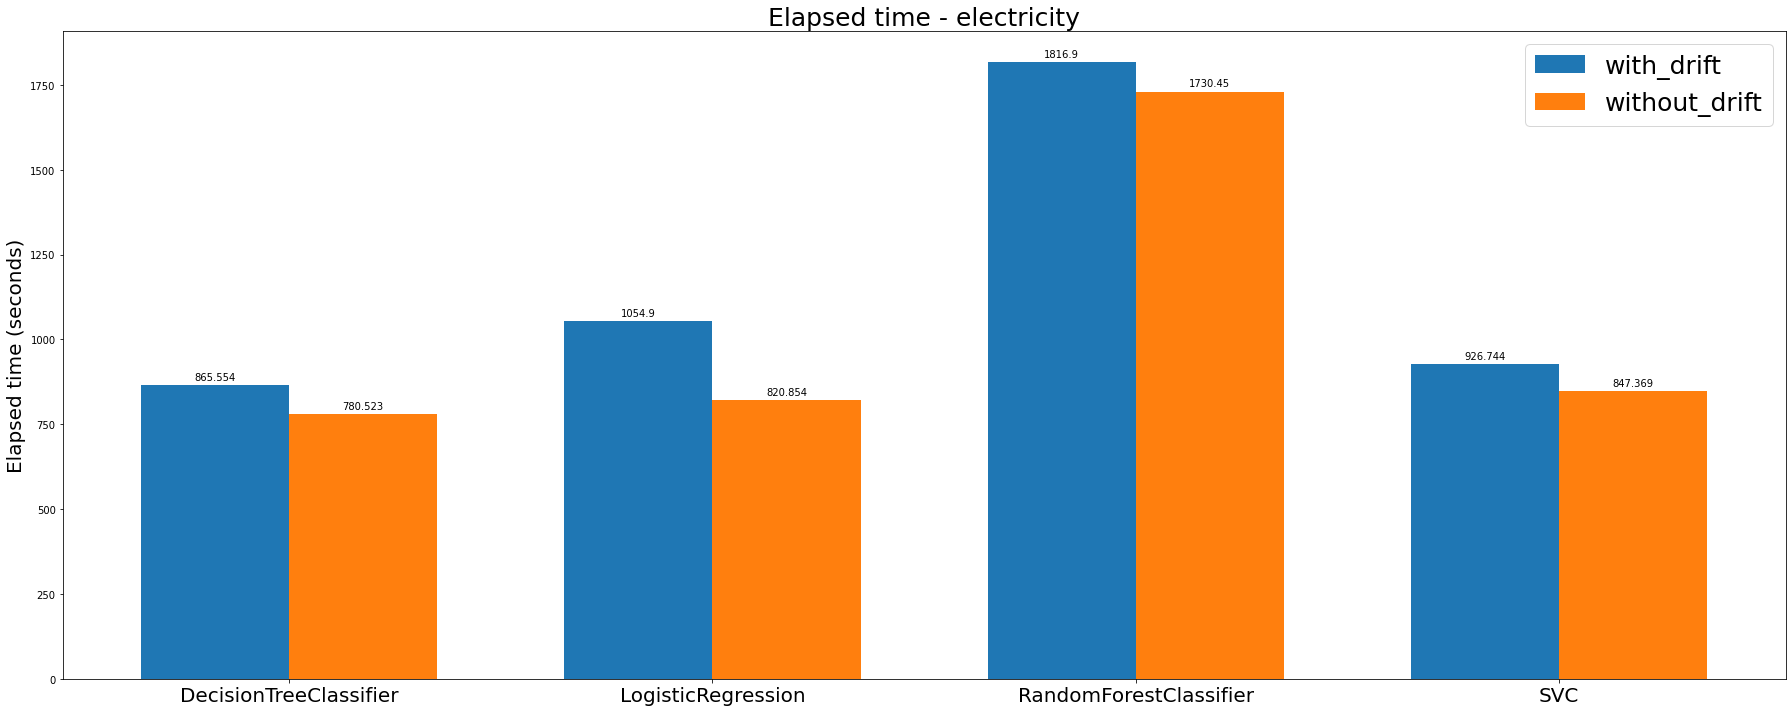

In [5]:
plot_dataset_time(datasets[0])

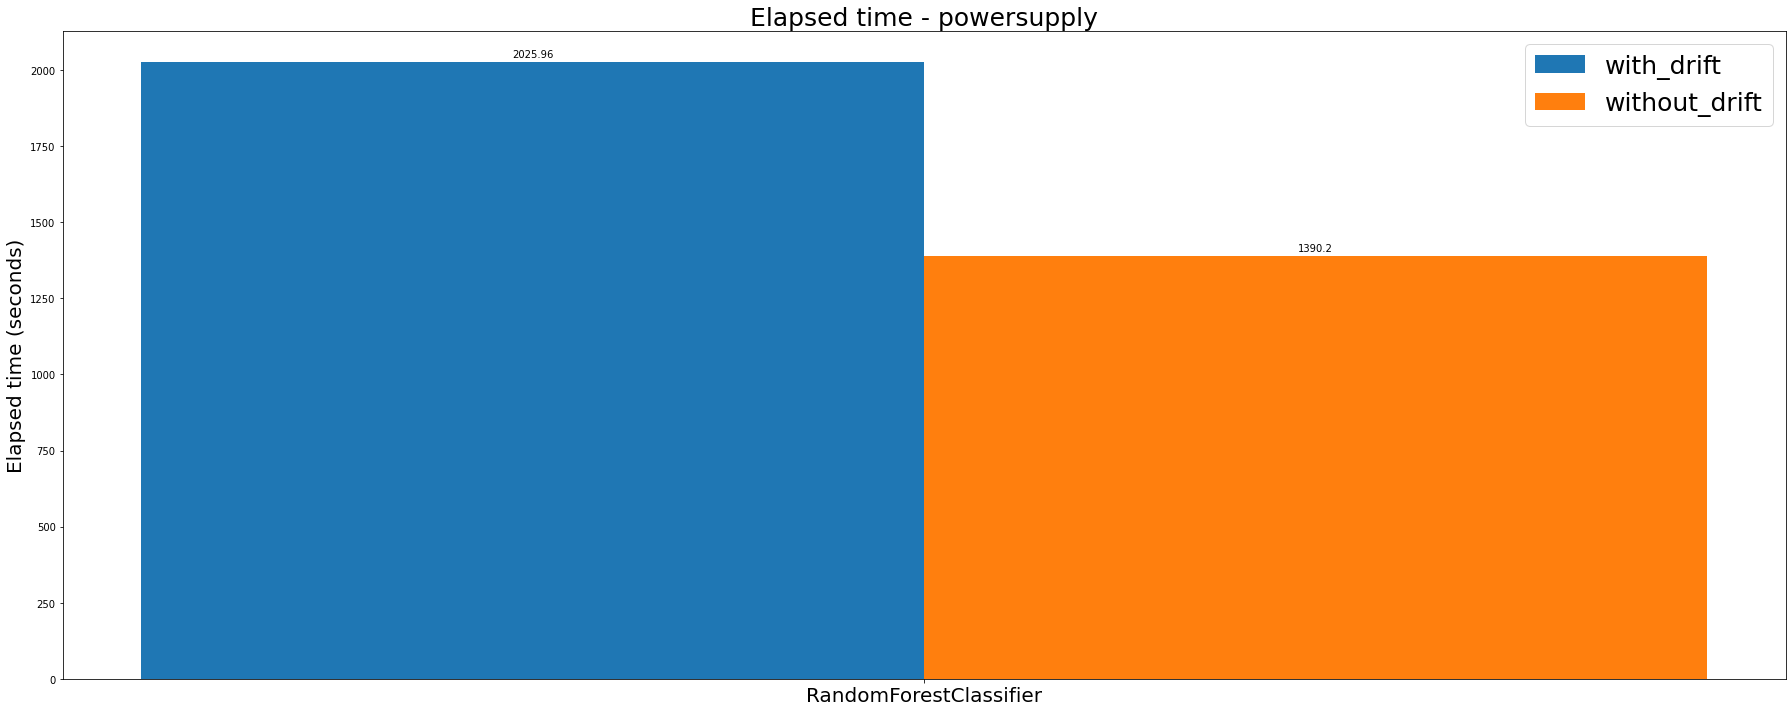

In [6]:
plot_dataset_time(datasets[1])

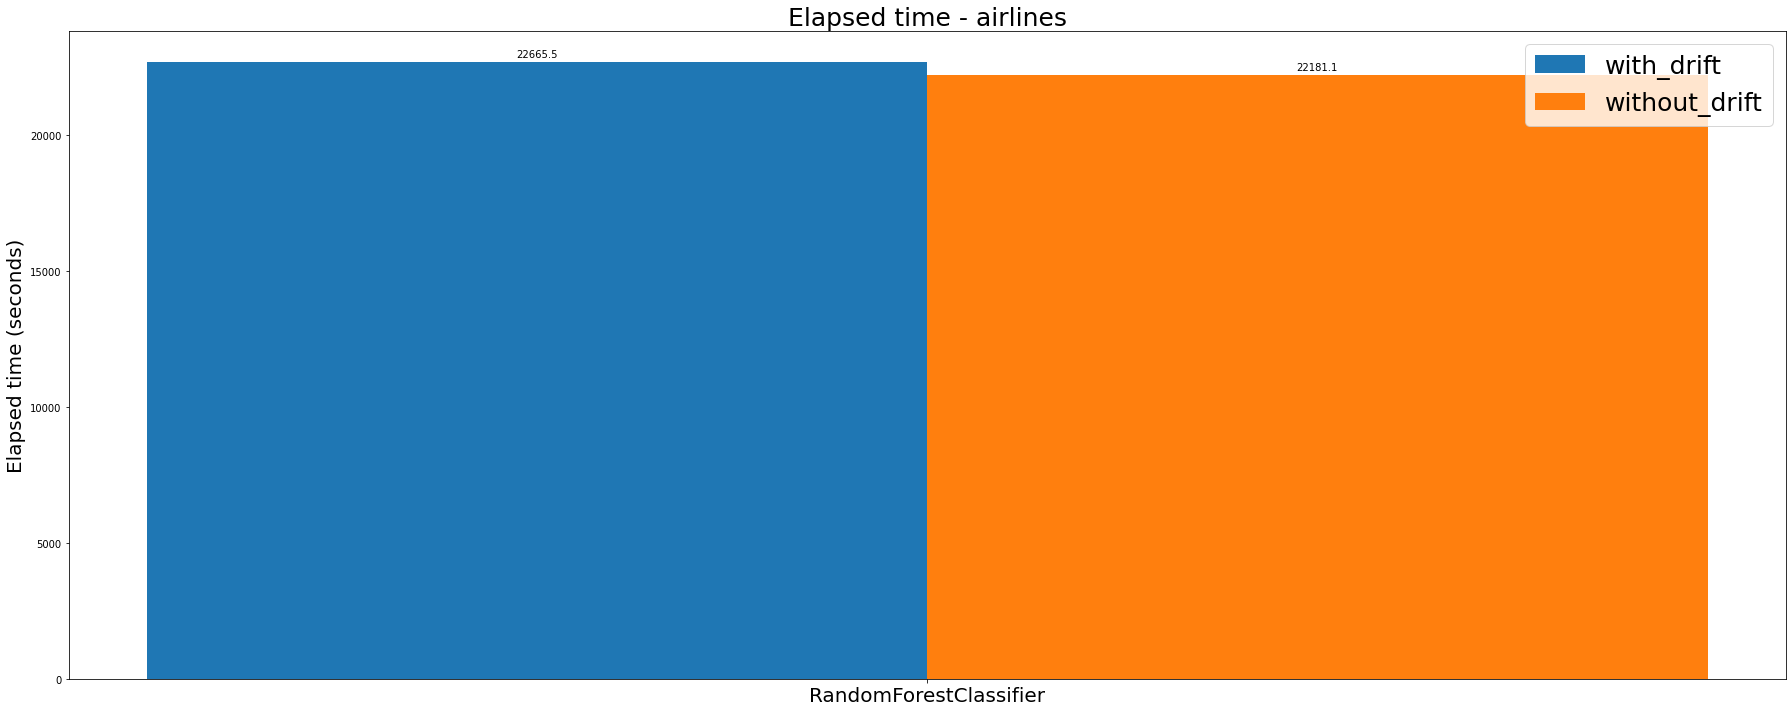

In [7]:
plot_dataset_time(datasets[2])

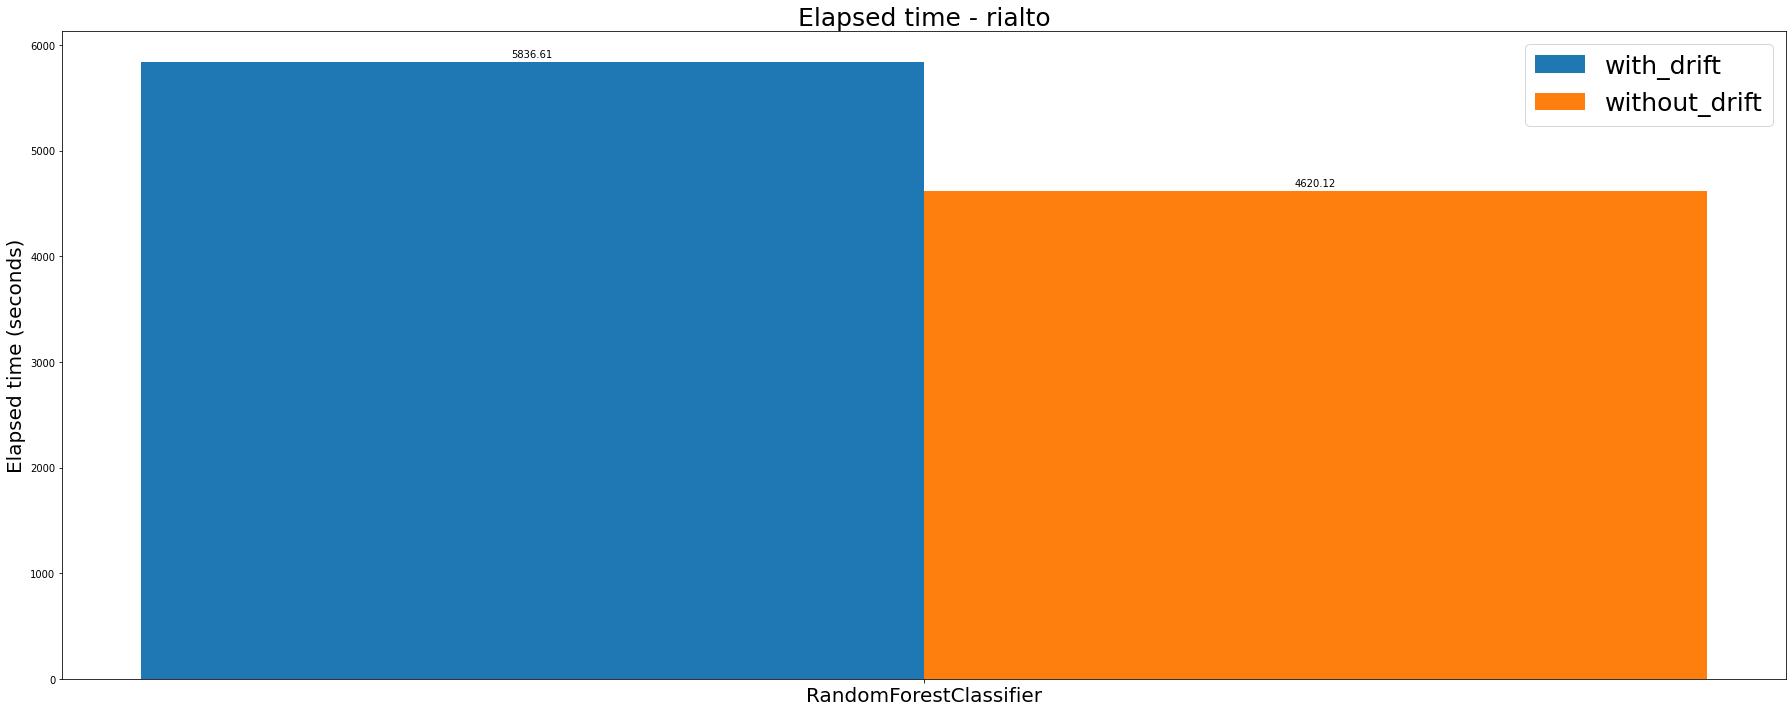

In [8]:
plot_dataset_time(datasets[3])